In [1]:
from urllib.request import urlopen
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time

def distancia(dataframe):
    dataframe['dist_per'] = ((dataframe['x']- dataframe['x'].shift(-1))**2 +
                            (dataframe['y']- dataframe['y'].shift(-1))**2 +
                            (dataframe['z']- dataframe['z'].shift(-1))**2)**(1/2)
    x= dataframe.columns.get_loc('x')
    y= dataframe.columns.get_loc('y')
    z =dataframe.columns.get_loc('z')

    dataframe.iat[len(dataframe)-1,dataframe.columns.get_loc('dist_per')] = ((dataframe.iat[0,x]- dataframe.iat[len(dataframe)-1,x])**2 
                                                 + (dataframe.iat[0,y]- dataframe.iat[len(dataframe) -1,y])**2
                                                 + (dataframe.iat[0,z]- dataframe.iat[len(dataframe)-1,y])**2)**(1/2)

def velocidade_curva(curva,escala):
    distancia(curva)
    distancia_curva = curva['dist_per'].sum()- curva.iat[len(curva)-1, curva.columns.get_loc('dist_per')]
    temp_inicio = pd.to_datetime(curva.index.min())
    temp_final = pd.to_datetime(curva.index.max())
    intervalo = (temp_final-temp_inicio).total_seconds()
    velocidade = distancia_curva/((intervalo/3600)*escala)
    return velocidade








In [2]:
retorno0 = requests.get("https://api.openf1.org/v1/sessions?date_start%3E%3D2025-03-01&date_end%3C%3D2025-08-30&session_type=Qualifying", timeout= 20)
while retorno0.status_code != 200:
    time.sleep(2)
    retorno0 = requests.get("https://api.openf1.org/v1/sessions?date_start%3E%3D2025-03-01&date_end%3C%3D2025-08-30&session_type=Qualifying", timeout= 20)
    
sessoes = pd.DataFrame(json.loads(retorno0.text))
sessoes

,meeting_key,session_key,location,date_start,date_end,session_type,session_name,country_key,country_code,country_name,circuit_key,circuit_short_name,gmt_offset,year
0,1254,9689,Melbourne,2025-03-15T05:00:00+00:00,2025-03-15T06:00:00+00:00,Qualifying,Qualifying,5,AUS,Australia,10,Melbourne,11:00:00,2025
1,1255,9989,Shanghai,2025-03-21T07:30:00+00:00,2025-03-21T08:14:00+00:00,Qualifying,Sprint Qualifying,53,CHN,China,49,Shanghai,08:00:00,2025
2,1255,9994,Shanghai,2025-03-22T07:00:00+00:00,2025-03-22T08:00:00+00:00,Qualifying,Qualifying,53,CHN,China,49,Shanghai,08:00:00,2025
3,1256,10002,Suzuka,2025-04-05T06:00:00+00:00,2025-04-05T07:00:00+00:00,Qualifying,Qualifying,4,JPN,Japan,46,Suzuka,09:00:00,2025
4,1257,10010,Sakhir,2025-04-12T16:00:00+00:00,2025-04-12T17:00:00+00:00,Qualifying,Qualifying,36,BRN,Bahrain,63,Sakhir,03:00:00,2025
5,1258,10018,Jeddah,2025-04-19T17:00:00+00:00,2025-04-19T18:00:00+00:00,Qualifying,Qualifying,153,KSA,Saudi Arabia,149,Jeddah,03:00:00,2025
6,1259,10024,Miami,2025-05-02T20:30:00+00:00,2025-05-02T21:14:00+00:00,Qualifying,Sprint Qualifying,19,USA,United States,151,Miami,-04:00:00,2025
7,1259,10029,Miami,2025-05-03T20:00:00+00:00,2025-05-03T21:00:00+00:00,Qualifying,Qualifying,19,USA,United States,151,Miami,-04:00:00,2025
8,1260,9983,Imola,2025-05-17T14:00:00+00:00,2025-05-17T15:00:00+00:00,Qualifying,Qualifying,13,ITA,Italy,6,Imola,02:00:00,2025
9,1261,9975,Monaco,2025-05-24T14:00:00+00:00,2025-05-24T15:00:00+00:00,Qualifying,Qualifying,114,MON,Monaco,22,Monte Carlo,02:00:00,2025


In [3]:
def pilotos_na_sessao(sessao):
    retorno1 =requests.get(f"https://api.openf1.org/v1/drivers?session_key={sessao}", timeout= 20)
    while retorno1.status_code != 200:
        time.sleep(2)
        retorno1 =requests.get(f"https://api.openf1.org/v1/drivers?session_key={sessao}", timeout= 20)
    pilotos = pd.DataFrame(json.loads(retorno1.text))
    pilotos = pilotos.drop(columns=['meeting_key','session_key','broadcast_name','team_colour','first_name','last_name','headshot_url','country_code'])
    return pilotos


In [4]:
def voltas(piloto,sessao):
    retorno2 = requests.get(f"https://api.openf1.org/v1/laps?driver_number={piloto}&session_key={sessao}", timeout=20)
    while retorno2.status_code != 200:
        time.sleep(2)
        retorno2 = requests.get(f"https://api.openf1.org/v1/laps?driver_number={piloto}&session_key={sessao}", timeout=20)
    classificacao = pd.DataFrame(json.loads(retorno2.text))
    if len(classificacao)>2:
        return classificacao
    else:
        return None

In [5]:
def volta_rapida(classificacao,piloto,sessao):
    linha = list(classificacao[classificacao['st_speed'] == classificacao['st_speed'].max()].index)
    inicio_volta = classificacao.iloc[linha[0], 4]
    final_volta = classificacao.iloc[linha[0]+1,4]
    retorno3 =  requests.get(f"https://api.openf1.org/v1/location?driver_number={piloto}&session_key={sessao}&date>={inicio_volta}&date<={final_volta}", timeout = 20)
    while retorno3.status_code != 200:
        time.sleep(2)
        retorno3 =  requests.get(f"https://api.openf1.org/v1/location?driver_number={piloto}&session_key={sessao}&date>={inicio_volta}&date<={final_volta}", timeout = 20)
    voltas_base = pd.DataFrame(json.loads(retorno3.text))
    return voltas_base,inicio_volta,final_volta


In [6]:
def telemetria(piloto,sessao,inicio_volta,final_volta):
    retorno4 =  requests.get(f"https://api.openf1.org/v1/car_data?driver_number={piloto}&session_key={sessao}&date>={inicio_volta}&date<={final_volta}", timeout = 20)
    while retorno4.status_code != 200:
        time.sleep(2)
        retorno4 =  requests.get(f"https://api.openf1.org/v1/car_data?driver_number={piloto}&session_key={sessao}&date>={inicio_volta}&date<={final_volta}", timeout = 20)
    carro = pd.DataFrame(json.loads(retorno4.text))
    carro = carro.drop(columns=['session_key','meeting_key','driver_number'])
    return carro

In [7]:
def unir_telemetria_volta_rapida(voltas_base,carro):
    voltas_base['date']= pd.to_datetime(voltas_base['date'])
    voltas_base.set_index('date', inplace=True)
    carro['date']= pd.to_datetime(carro['date'], errors='coerce', format ='ISO8601')
    carro.set_index('date', inplace=True)

    voltas_completa = voltas_base.join(carro, how='outer', lsuffix='_base',rsuffix='_carro')
    return voltas_completa

In [8]:
def mudar_index(voltas_base,voltas_completa,carro):
    novo_tempo = pd.date_range(start=min(voltas_base.index.min(),carro.index.min()),end=max(voltas_base.index.max(),carro.index.max()),freq=pd.to_timedelta(1 / 3.7, unit='s'))
    novo_index = novo_tempo.union(voltas_completa.index)
    voltas_reindex = voltas_completa.reindex(novo_index)
    return voltas_reindex

In [9]:
def interpolar(voltas_reindex):
    voltas_final = voltas_reindex.interpolate(method='time')
    distancia(voltas_final)
    return voltas_final

In [10]:
pilotos = pilotos_na_sessao(sessoes.loc[0,'session_key'])
classificacao_exemplo = voltas(pilotos.loc[0,'driver_number'], sessoes.loc[0,'session_key'])
volta_exemplo,inicio_volta,final_volta = volta_rapida(classificacao_exemplo,pilotos.loc[0,'driver_number'],sessoes.loc[0,'session_key'])
dados_carro = telemetria(pilotos.loc[0,'driver_number'],sessoes.loc[0,'session_key'],inicio_volta,final_volta)
volta_final= interpolar(mudar_index(volta_exemplo,unir_telemetria_volta_rapida(volta_exemplo,dados_carro),dados_carro))
volta_final

,session_key,meeting_key,driver_number,z,x,y,rpm,speed,brake,throttle,drs,n_gear,dist_per
2025-03-15 05:50:39.768000+00:00,9689.0,1254.0,1.0,84.000000,-1301.000000,-1233.000000,NaN,NaN,NaN,NaN,NaN,NaN,100.707924
2025-03-15 05:50:39.881000+00:00,9689.0,1254.0,1.0,83.435000,-1373.884959,-1163.505039,11316.000000,319.000000,0.0,100.0,12.0,8.0,77.536290
2025-03-15 05:50:39.968000+00:00,9689.0,1254.0,1.0,83.000000,-1430.000000,-1110.000000,11350.800026,320.087501,0.0,100.0,12.0,8.0,62.074003
2025-03-15 05:50:40.038270270+00:00,9689.0,1254.0,1.0,82.650397,-1475.098805,-1067.348417,11378.908109,320.965878,0.0,100.0,12.0,8.0,2.411337
2025-03-15 05:50:40.041000+00:00,9689.0,1254.0,1.0,82.636816,-1476.850720,-1065.691567,11380.000000,321.000000,0.0,100.0,12.0,8.0,113.070285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-15 05:51:55.042000+00:00,9689.0,1254.0,1.0,85.389141,-1067.171807,-1455.325924,11058.000000,310.000000,0.0,100.0,12.0,8.0,107.618409
2025-03-15 05:51:55.128000+00:00,9689.0,1254.0,1.0,85.000000,-1145.000000,-1381.000000,11071.562741,310.924732,0.0,100.0,12.0,8.0,29.109962
2025-03-15 05:51:55.173405330+00:00,9689.0,1254.0,1.0,84.848142,-1166.108210,-1360.954793,11078.723454,311.412963,0.0,100.0,12.0,8.0,94.624569
2025-03-15 05:51:55.321000+00:00,9689.0,1254.0,1.0,84.354515,-1234.722359,-1295.796033,11102.000000,313.000000,0.0,100.0,12.0,8.0,67.957930


<Axes: xlabel='x', ylabel='y'>

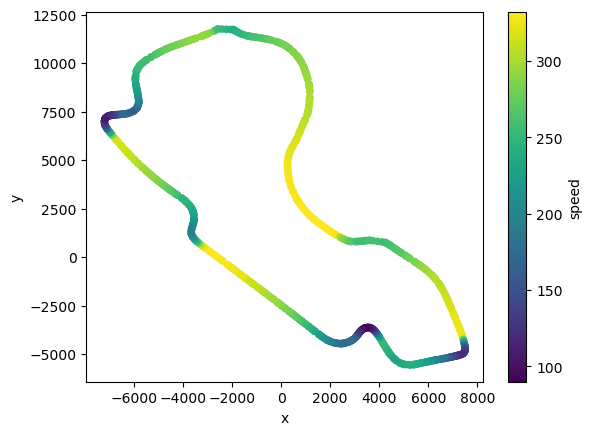

In [11]:
volta_final.plot.scatter(x='x',y='y',c='speed')

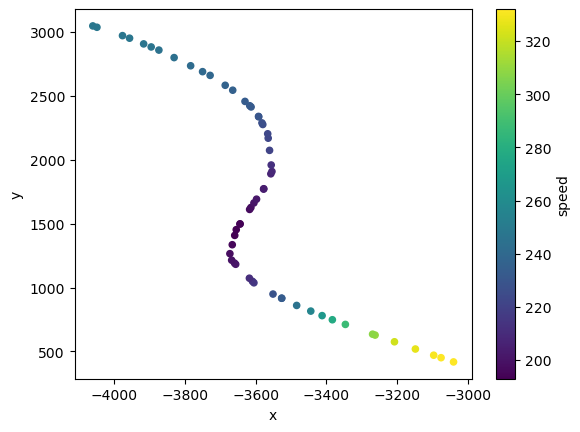

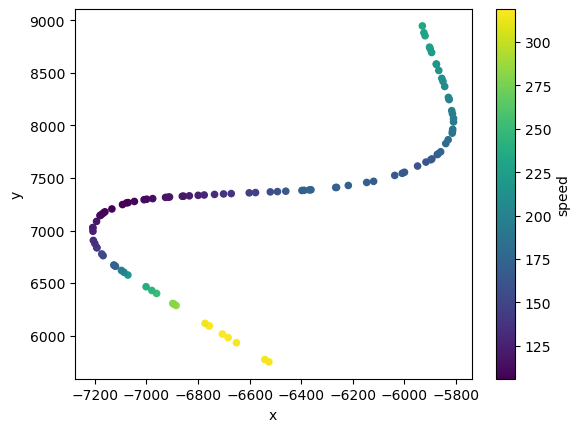

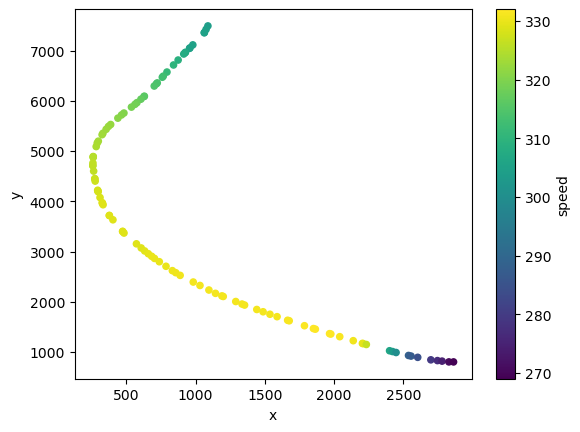

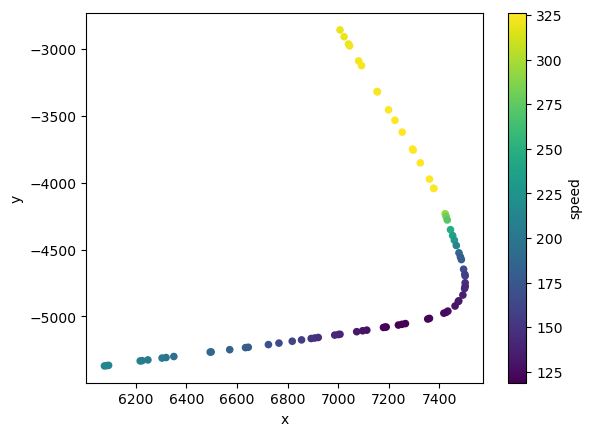

In [12]:
def curvas(volta_final):
    curva01x = (volta_final['x']<=-3000) & (volta_final['x']>=-4100)
    curva01y = (volta_final['y']>=-1100) & (volta_final['y']<=4900)
    curva01 = volta_final[curva01x & curva01y].copy()
    

    curva02x = (volta_final['x']<=-5000) & (volta_final['x']>=-8000)
    curva02y = (volta_final['y']>=5700) & (volta_final['y']<=9000)
    curva02 = volta_final[curva02x & curva02y].copy()
    

    curva03x = (volta_final['x']<=3000) & (volta_final['x']>=0)
    curva03y = (volta_final['y']>=200) & (volta_final['y']<=7500)
    curva03 = volta_final[curva03x & curva03y].copy()
    

    curva04x = (volta_final['x']<=8000) & (volta_final['x']>=6000)
    curva04y = (volta_final['y']>=-6000) & (volta_final['y']<=-2700)
    curva04 = volta_final[curva04x & curva04y].copy()
    

    return [curva01,curva02,curva03,curva04]

setores = curvas(volta_final)
for curva in setores:
    curva.plot.scatter(x='x',y='y',c='speed')

In [13]:
distancia_volta = volta_final['dist_per'].sum() 
distancia_real = 5.278 # km
escala = distancia_volta/distancia_real # unidades arbitrárias por km


In [14]:
for i in range(len(setores)):
    pilotos[f'curva {i+1}'] = pd.NA
for piloto in pilotos['driver_number']:
    print(piloto)
    classificacao_exemplo = voltas(piloto, sessoes.loc[0,'session_key'])
    if classificacao_exemplo is not None:
        volta_exemplo,inicio_volta,final_volta = volta_rapida(classificacao_exemplo,piloto,sessoes.loc[0,'session_key'])
        dados_carro = telemetria(piloto,sessoes.loc[0,'session_key'],inicio_volta,final_volta)
        volta_final= interpolar(mudar_index(volta_exemplo,unir_telemetria_volta_rapida(volta_exemplo,dados_carro),dados_carro))
        setores = curvas(volta_final)
        for i in range(len(setores)):
            indice = pilotos[pilotos['driver_number']== piloto].index[0]
            print(indice)
            pilotos.at[indice, f'curva {i+1}']= velocidade_curva(setores[i],escala)
    else:
        for i in range(len(setores)):
            indice = pilotos[pilotos['driver_number']== piloto].index[0]
            pilotos.loc[indice, f'curva {i+1}']= 0

1
0
0
0
0
4
1
1
1
1
5
2
2
2
2
6
3
3
3
3
7
4
4
4
4
10
5
5
5
5
12
6
6
6
6
14
7
7
7
7
16
8
8
8
8
18
9
9
9
9
22
10
10
10
10
23
11
11
11
11
27
12
12
12
12
30
13
13
13
13
31
14
14
14
14
44
15
15
15
15
55
16
16
16
16
63
17
17
17
17
81
18
18
18
18
87


In [15]:
pilotos

,driver_number,full_name,name_acronym,team_name,curva 1,curva 2,curva 3,curva 4
0,1,Max VERSTAPPEN,VER,Red Bull Racing,228.675973,172.090228,315.578477,194.022329
1,4,Lando NORRIS,NOR,McLaren,213.172949,173.461705,309.189883,201.71175
2,5,Gabriel BORTOLETO,BOR,Kick Sauber,219.019318,169.203009,309.541404,193.846275
3,6,Isack HADJAR,HAD,Racing Bulls,217.174592,170.201357,312.685208,200.484078
4,7,Jack DOOHAN,DOO,Alpine,227.216587,175.025705,313.729372,187.208446
5,10,Pierre GASLY,GAS,Alpine,215.739124,167.272755,314.222181,197.158168
6,12,Andrea Kimi ANTONELLI,ANT,Mercedes,215.309021,170.659881,306.484699,198.359723
7,14,Fernando ALONSO,ALO,Aston Martin,226.84338,167.970455,309.657364,199.12517
8,16,Charles LECLERC,LEC,Ferrari,216.840093,135.850038,274.823111,162.894286
9,18,Lance STROLL,STR,Aston Martin,215.683257,171.593405,314.499197,190.511127
